<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_4_resz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

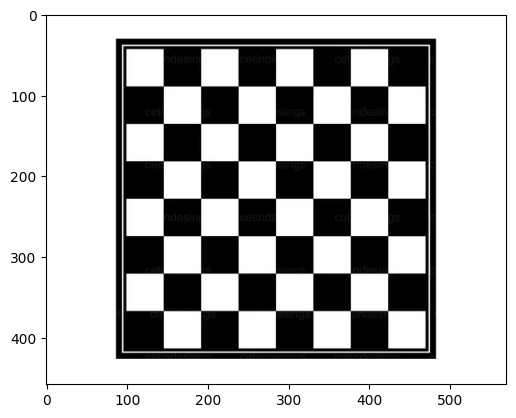

In [6]:
# Beolvassa a "messi.jpg" képet a megadott elérési útról, és színes képként tárolja el a src változóban.
src = cv.imread("/content/drive/MyDrive/Pannon/Demonstrátori/órai anyagok/chessboard.jpg", cv.IMREAD_COLOR)
plt.imshow(src, 'gray')

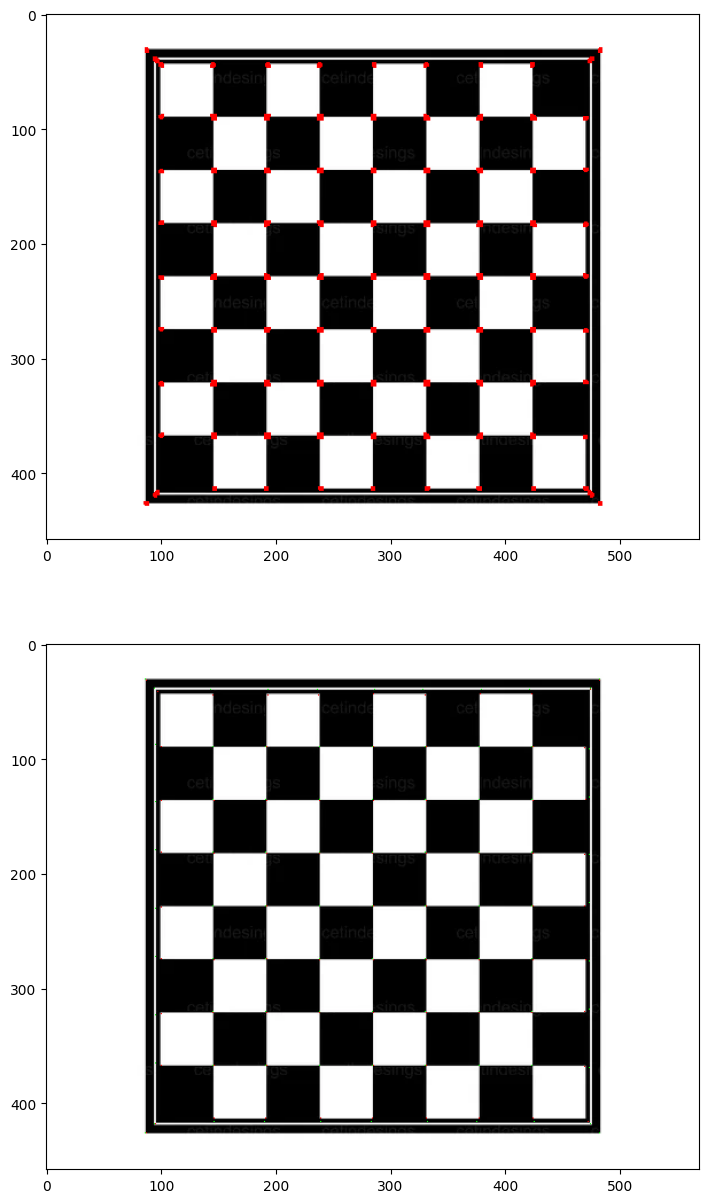

In [7]:
# Másolat készítése a képről
src2 = src.copy()

# A képet szürkeárnyalatosra konvertáljuk
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# Harris sarokpontok keresése a képen
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)

# Sarokpontokat kiemelő küszöbölés
ret, dst2 = cv.threshold(dst, 0.01 * dst.max(), 255, 0)
dst2 = np.uint8(dst2)

# Kapcsolódó komponensek (connected components) keresése a kiemelt sarokpontokon
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst2)

# Sarokpontok finomítása a sarokpontok közötti részeken
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)

# Kész kép elkészítése a kiemelt sarokpontokkal
res = np.hstack((centroids, corners))
res = np.int0(res)

# Eredeti képen pirosra színezzük a kiemelt sarokpontokat
src[dst > 0.01 * dst.max()] = [0, 0, 255]

# Másolt képen piros és zöld színezzük a sarokpontokat
src2[res[:, 1], res[:, 0]] = [0, 0, 255]
src2[res[:, 3], res[:, 2]] = [0, 255, 0]

# Két képet jelenítünk meg egymás alatt
f, axs = plt.subplots(2, 1, figsize=(20, 15))
plt.subplot(211), plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
plt.subplot(212), plt.imshow(cv.cvtColor(src2, cv.COLOR_BGR2RGB))
plt.show()
